In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

before iteration [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 2. 3. 4. 5. 6. 5. 4. 3. 2. 1.]


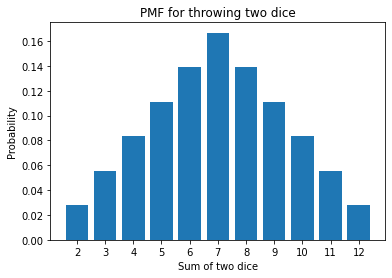

<Figure size 432x288 with 0 Axes>

In [8]:
x = np.arange(2, 13)
p = np.zeros(11)
print('before iteration',p)
for i in range(1, 7):
    for j in range(1, 7):
        p[i+j-2] += 1
print(p)
p /= 36
# Create a bar chart of the PMF
plt.bar(x, p, align='center')
plt.xticks(x)
plt.xlabel('Sum of two dice')
plt.ylabel('Probability')
plt.title('PMF for throwing two dice')
plt.show()
plt.savefig('Pmf1.png')

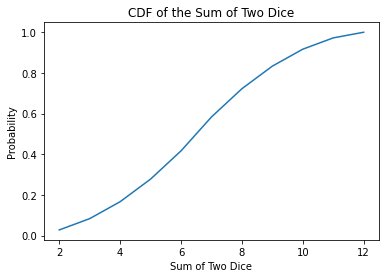

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the PMF for the sum of two dice
dice_pmf = np.zeros(11)
for i in range(1, 7):
    for j in range(1, 7):
        dice_pmf[i+j-2] += 1

dice_pmf /= 36

# Calculate the CDF of the PMF
dice_cdf = np.cumsum(dice_pmf)

# Plot the CDF
plt.plot(np.arange(2, 13), dice_cdf)
plt.title('CDF of the Sum of Two Dice')
plt.xlabel('Sum of Two Dice')
plt.ylabel('Probability')
plt.show()

In [2]:
from scipy.stats import norm

In [14]:
data = np.random.normal(loc=10, scale=2, size=1000)

In [16]:
mu, std = norm.fit(data)

fit the distribution

In [19]:
x = np.linspace(data.min(), data.max(), 100)
pdf = norm.pdf(x, mu, std)

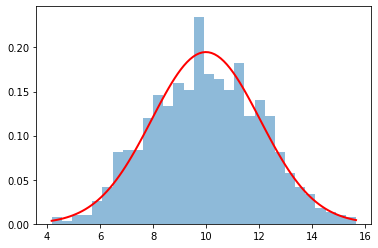

In [20]:
plt.hist(data, density=True, alpha=0.5, bins=30)
plt.plot(x, pdf, 'r-', lw=2)
plt.show()

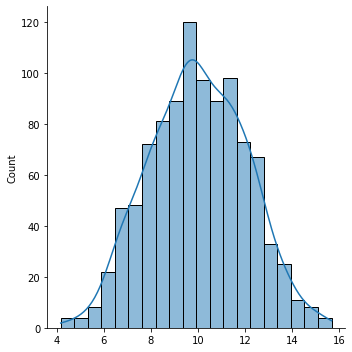

In [26]:
sns.displot(data,kde=True)

-- non parematric estimation 

In [3]:
from sklearn.neighbors import KernelDensity

In [30]:
data = np.array([1.2, 1.5, 1.7, 2.0, 2.1, 2.3, 2.4, 2.6, 2.8, 3.0])

In [31]:
# Rule of thumb bandwidth selection
bw = (data.max() - data.min()) / 4

In [45]:
kde = KernelDensity(kernel='gaussian', bandwidth=bw)

# Fit the kernel density estimate to the data
kde.fit(data[:,None])

KernelDensity(bandwidth=0.45)

In [46]:
x_grid = np.linspace(data.min() - 1, data.max() + 1, 500)
log_density = kde.score_samples(x_grid[:, None])
density = np.exp(log_density)

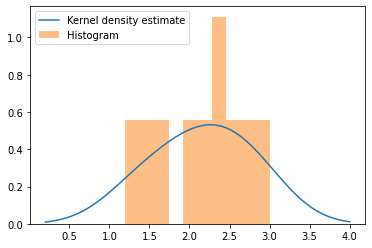

In [47]:
plt.plot(x_grid, density, label='Kernel density estimate')
plt.hist(data, density=True, alpha=0.5, label='Histogram')
plt.legend()
plt.show()

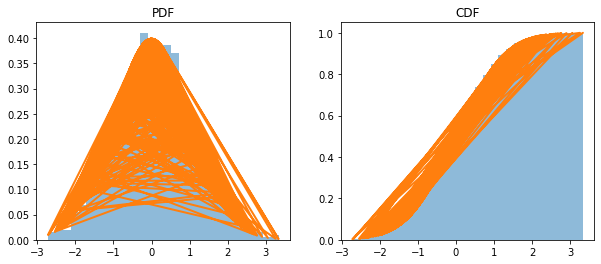

In [48]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Generate some sample data
data = np.random.normal(0, 1, 1000)

# Calculate the PDF and CDF using the norm object from SciPy
pdf = norm.pdf(data)
cdf = norm.cdf(data)

# Plot the PDF and CDF
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].hist(data, density=True, bins=30, alpha=0.5)
ax[0].plot(data, pdf, linewidth=2)
ax[0].set_title('PDF')
ax[1].hist(data, density=True, bins=30, alpha=0.5, cumulative=True)
ax[1].plot(data, cdf, linewidth=2)
ax[1].set_title('CDF')
plt.show()

In [8]:
from numpy.random  import normal
from scipy.stats import gaussian_kde

In [21]:
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [14]:
def silverman_bandwidth(data):
    """
    Calculates the bandwidth using Silverman's rule for kernel density estimation.
    :param data: A 1D array of data points.
    :return: The bandwidth.
    """
    n = len(data)
    std = np.std(data)
    iqr = np.subtract(*np.percentile(data, [75, 25]))
    h = 0.9 * min(std, iqr / 1.34) * n ** (-0.2)
    return h

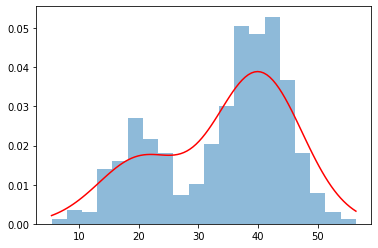

In [24]:
# Choose a kernel function (Gaussian) and a bandwidth (0.5)
kernel = 'gaussian'
bandwidth = 0.5

# Create a KDE object and estimate the PDF
kde = gaussian_kde(sample, bw_method=bandwidth)
x = np.linspace(sample.min(), sample.max(), 100)
pdf = kde.evaluate(x)

# Plot the sample and the estimated PDF
plt.hist(sample, density=True, alpha=0.5, bins=20)
plt.plot(x, pdf, color='red')
plt.show()

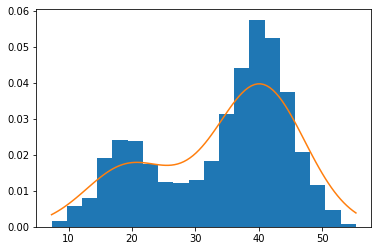

In [18]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)
plt.hist(sample, bins=20, density=True)
plt.plot(values[:], probabilities)
plt.show()